In [5]:
import pandas as pd
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt

from geopy.distance import geodesic
from collections import Counter

In [2]:
df = pd.read_csv("/content/iller.csv")

In [163]:
df = df.sort_values(by='Plaka')
df

,Il,Enlem,Boylam,Plaka
0,Adana,37.000000,35.321333,1
1,Adiyaman,37.764751,38.278561,2
2,Afyonkarahisar,38.750714,30.556692,3
3,Agri,39.626922,43.021596,4
5,Amasya,40.649910,35.835320,5
...,...,...,...,...
78,Yalova,40.650000,29.266667,77
42,Karabuk,41.206100,32.620350,78
50,Kilis,36.718399,37.121220,79
63,Osmaniye,37.213026,36.176261,80


In [164]:
# A function to calculate distances between cities
def calculate_distance(row1, row2):
    coords_1 = (row1['Enlem'], row1['Boylam'])
    coords_2 = (row2['Enlem'], row2['Boylam'])
    return geodesic(coords_1, coords_2).kilometers

# Get combinations of all cities
city_combinations = [(city1, city2) for index1, city1 in df.iterrows() for index2, city2 in df.iterrows()]

# Create the distance matrix
distance_df = pd.DataFrame(index=df['Plaka'], columns=df['Plaka'])

# Fill in the distances
for city1, city2 in city_combinations:
    distance_df.loc[city1['Plaka'], city2['Plaka']] = calculate_distance(city1, city2)

# Convert NaN values to zero
distance_df = distance_df.fillna(0)


distance_df

Plaka,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,81
Plaka,,,,,,,,,,,,,,,,,,,,,
1,0.000000,275.298187,461.962844,733.527959,407.633198,389.177119,411.323563,728.707423,668.624038,713.507962,...,523.609594,638.042800,565.206060,784.638671,822.597955,663.516559,522.065164,163.517090,79.584509,558.902990
2,275.298187,0.000000,684.436754,461.422312,383.536896,528.135571,678.086602,486.498679,918.633541,927.542904,...,251.819757,374.047984,654.458239,531.842775,550.142364,841.190784,618.583268,155.015025,195.742989,702.679535
3,461.962844,684.436754,0.000000,1080.420409,499.308546,236.856941,207.591269,998.482342,257.399035,251.560400,...,929.619264,1056.690303,353.646840,1069.751073,1165.439568,238.130497,324.632624,620.872561,522.261471,238.011105
4,733.527959,461.422312,1080.420409,0.000000,622.678736,871.237910,1119.093529,200.696970,1332.664757,1298.041579,...,253.853656,249.435430,919.123382,166.955551,89.104636,1176.485668,899.442499,609.337255,654.861694,1017.909804
5,407.633198,383.536896,499.308546,622.678736,0.000000,266.112362,610.944073,507.372848,756.111814,686.447482,...,550.908652,678.560310,301.655074,580.891199,699.752842,555.439096,277.723086,450.532759,382.685667,395.691254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,663.516559,841.190784,238.130497,1176.485668,555.439096,315.603576,436.338040,1058.100517,333.671144,162.099434,...,1068.405415,1198.570795,287.496943,1132.472855,1254.974219,0.000000,289.121007,810.390512,709.963804,161.053252
78,522.065164,618.583268,324.632624,899.442499,277.723086,144.096267,507.595212,771.236387,554.033895,437.592327,...,819.224185,948.733224,43.723664,845.796043,974.676237,289.121007,0.000000,632.552031,539.186716,129.515715
79,163.517090,155.015025,620.872561,609.337255,450.532759,515.245722,572.732606,641.197774,832.141085,871.773925,...,378.508295,483.829776,673.343005,686.744537,697.054362,810.390512,632.552031,0.000000,100.470016,691.319828


In [154]:
def createFoodMatrix_2(numberoffood, numberofnode):

    lists = []
    for _ in range(numberoffood):
      nodes = list(range(1, numberofnode+1))  # 1'den 81'e kadar plakaları içeren liste
      list_f = random.sample(nodes, len(nodes))
      lists.append(list_f)  # The created list will be added to the lists

    foods = np.array(lists)
    return foods

In [20]:
def createFoodMatrix(numberoffood, numberofnode):
    # Let's create a list containing empty lists
    lists = []

    for _ in range(numberoffood):  # Loop to create a certain number of lists
        list_f = []

        while len(list_f) != numberofnode:
            random_n = random.choice([num for num in range(1, numberofnode + 1) if num not in list_f])
            list_f.append(random_n)

        lists.append(list_f)  # The created list will be added to the lists

    foods = np.array(lists)
    return foods

In [21]:
# Change Order
def changeOrder(food, index1, index2):

    newFood =  foods[food].copy()
    emptyVariable = newFood[index1]
    newFood[index1] = newFood[index2]
    newFood[index2] = emptyVariable

    return newFood

In [31]:
#Scroll Left
def scrollLeft(food, index1, index2):

    newFood =  foods[food].copy()
    small = min(index1, index2)
    large = max(index1, index2)
    firstElement = newFood[small]

    for i in range(small, large-1):
      newFood[i] = newFood[i+1]

    newFood[large-1] = firstElement;
    return newFood

In [35]:
#REVERSE ARRAY OPERATOR
def reverseArray(food,index1,index2):

      newFood =  foods[food].copy()
      small = min(index1, index2)
      large = max(index1, index2)

      while small<large:
        tempVariable = newFood[small]
        newFood[small] = newFood[large]
        newFood[large] = tempVariable
        small = small+1
        large = large -1

      return newFood

# **Algorithm**

In [165]:
numberOfEmployedBees = 100
numberOfOnlookerBees = 100
numberOfFoods = 10
numberOfNodes = len(df)
limit = 100
bestSolutionValue = 1000000
bestSolution = None

#foods = createFoodMatrix(numberOfFoods, numberOfNodes)
foods = createFoodMatrix_2(numberOfFoods, numberOfNodes)
print(foods)

numberOfTrials = np.zeros(foods.shape[0])

[[64 53 63  5  9 79 41 43 34 36 33 57 37  2 25 31 17  7 10  1 51 27 60 42
   4 76 24 74 54 19 56 28 81 62 29 80 30 44 39 73 65 14 32 70 35 49  8 47
  71 22 68 11 72 20 50 58 23 55 40 59 66 16 48 18 26 78 69  3 13 61 15 77
  46 52 38  6 12 21 67 45 75]
 [81 56 22 60  3  2 43 26 62 13 29  1 53 34 24 14 37 74  4 20 27 57 45 15
  66 23 76  6 10 51 77  5 52  8 54  9 48 12 18 30 33 72 17 44 39 64 25 35
  65 59 75 80 41 58 21 71 63 49 69 67 40 70 36 11 28 73 32 46 78 38 55 19
  79  7 47 31 42 50 16 61 68]
 [33 43  8 46 13 73 67  4 77 74 81 52 23 42 76 48 80 22  7 63  2 18 60 49
   1 78 79 26 20 14 61 59 38 19 45 70 69 37 65 35 17  6 16 51 28 68  5 47
  75 55 12 36 58 54 40 21 39 64 30 24 27  3 15 66 62 44 53 25 57 72 50 56
  31  9 41 10 71 34 11 29 32]
 [50  1 71 17 80 64 26 30 57 56 47 31 20 35  8 76 29 68 61 75 37 27  4 69
  51 81 25  9 54 32 46 10 63 40 52 34 41 16 11 67 58 39  3 13 66 62 12 49
  74 18  5 24 60 53 33 15 42 78 22 28 59 73 79 77 48 55 23 36 19  7 21 45
  65 70  2  6 38 43 72

In [166]:
foodDistances = {}

for a in range(0,foods.shape[0]):
  distance = 0
  maxDistance = 0
  minDistance = 1000000
  for i in  range(0, numberOfNodes-1):
    node_from = foods[a,i]
    node_to =   foods[a,i+1]
    newDistance = distance_df.iloc[node_from-1,node_to-2]
    distance = distance + newDistance



  point = distance

  if point < bestSolutionValue:
    bestSolution = foods[a].tolist()
    bestSolutionValue = point

  foodDistances[f"food_{a}"] = point

foodDistances

{'food_0': 43978.41355615412,
 'food_1': 47238.21590471709,
 'food_2': 43904.34160278503,
 'food_3': 40614.06317221249,
 'food_4': 43286.63246138811,
 'food_5': 42422.144509308906,
 'food_6': 43418.23212137573,
 'food_7': 40313.6273585952,
 'food_8': 49679.267921721636,
 'food_9': 40691.58618236044}

In [167]:
print(bestSolution)

[46, 26, 75, 63, 43, 44, 76, 73, 28, 19, 12, 7, 64, 56, 70, 61, 11, 34, 16, 33, 53, 55, 17, 18, 69, 58, 59, 15, 21, 29, 72, 9, 65, 40, 80, 62, 32, 74, 35, 68, 13, 37, 54, 42, 60, 79, 24, 20, 10, 1, 67, 71, 4, 8, 48, 30, 78, 51, 45, 47, 14, 66, 77, 50, 25, 38, 3, 49, 36, 81, 23, 52, 39, 27, 22, 31, 6, 5, 2, 57, 41]


In [168]:
bestSolutionValue

40313.6273585952

In [159]:
# Objective Function
def objectiveFunction(newFood):
  foodDistances = {}
  global bestSolution
  global bestSolutionValue
  distance = 0
  minDistance = 0
  maxDistance = 1000000
  for i in  range(0, numberOfNodes-1):
      node_from = newFood[i]
      node_to =   newFood[i+1]
      newDistance = distance_df.iloc[node_from-1,node_to-1]
      distance = distance + newDistance
      '''
      if newDistance > maxDistance:
        maxDistance = newDistance

      if newDistance < minDistance:
        minDistance = newDistance
      '''

  point = distance

  if point < bestSolutionValue:
      bestSolution = newFood.tolist()
      bestSolutionValue = point

  foodDistances[f"food_{newFood}"] = point
  return point

  foodDistances[f"food_{a}"] = point

**Execution of the Algorithm**

In [191]:
iterationList = []
for iteration in range(1,1800):

    #Employed Bee Phase
    for i in range(1, numberOfEmployedBees+1):
        foodNumberToBeChanged = random.randint(0,numberOfFoods-1)  #numberOfFoods bu degisecek

        r = random.random()
        index1 = random.randint(0,numberOfNodes-1)
        index2= random.randint(0,numberOfNodes-1)
        while index1 == index2:
            index2 = random.randint(0,numberOfNodes-1)

        if r <5/10:
            newFood = changeOrder(foodNumberToBeChanged,index1,index2)


        elif r < 2/10:
            newFood = scrollLeft(foodNumberToBeChanged,index1,index2)

        else:
             newFood = reverseArray(foodNumberToBeChanged,index1,index2)



        newSolutionValue = objectiveFunction(newFood)

        if newSolutionValue < foodDistances[f"food_{foodNumberToBeChanged}"] :
            foodDistances[f"food_{foodNumberToBeChanged}"] = newSolutionValue
            foods[foodNumberToBeChanged] = newFood
            numberOfTrials[foodNumberToBeChanged] = 0
            if  bestSolutionValue > newSolutionValue:
              bestSolutionValue = newSolutionValue
              bestSolution = newFood
            else:
              numberOfTrials[foodNumberToBeChanged] = numberOfTrials[foodNumberToBeChanged]+1


    #Onlooker Bee Phase
    def chooseFood(fitness):
      total = 0
      r = random.random()
      for i in range(0, len(fitness)):
        total = total + fitness[i]
        if r < total:
          bs = i
          break
      return bs

    sabit = 1
    fitnessForMin = []
    fitness = []
    for i in range(0, numberOfFoods):
        fitnessForMin.append(sabit / foodDistances[f"food_{i}"])

    totalOfSolutionValues = 0
    totalOfSolutionValues = sum(fitnessForMin)

    for i in range(0, numberOfFoods):
        fitness.append(fitnessForMin[i] / totalOfSolutionValues)

    for i in range(1, numberOfOnlookerBees):
        foodNumberToBeChanged = chooseFood(fitness)


        r = random.random()
        index1 = random.randint(1,numberOfNodes-1)
        index2 = random.randint(1,numberOfNodes-1)
        while index1 == index2:
             index2 = random.randint(0,numberOfNodes-1)
        if r <5/10:
              newFood = changeOrder(foodNumberToBeChanged,index1,index2)
        elif r < 3/10:
              newFood = scrollLeft(foodNumberToBeChanged,index1,index2)
        else:
              newFood = reverseArray(foodNumberToBeChanged,index1,index2)


        newSolutionValue = objectiveFunction(newFood)

        if newSolutionValue < foodDistances[f"food_{foodNumberToBeChanged}"] :
            foodDistances[f"food_{foodNumberToBeChanged}"] = newSolutionValue
            foods[foodNumberToBeChanged] = newFood
            numberOfTrials[foodNumberToBeChanged] = 0
            if  bestSolutionValue > newSolutionValue:
                bestSolutionValue = newSolutionValue
                bestSolution = newFood
            else:
                numberOfTrials[foodNumberToBeChanged] = numberOfTrials[foodNumberToBeChanged]+1




    #Local Searchs
    #Local Search1
    def localSearch1(food):

      resultFood = foods[food].copy()
      resultSolutionValue = foodDistances[f"food_{food}"].copy()
      for i in range(1, len(resultFood)-1):
          for j in range(1, len(resultFood)):

            newFood,  = scrollLeft(food,i,j)

            newObjectiveFunctionValue = objectiveFunction(newFood)
            if newObjectiveFunctionValue < resultSolutionValue:
                resultSolutionValue = newObjectiveFunctionValue
                resultFood = newFood
      return resultFood, resultSolutionValue

    #Local Search 2
    def localSearch2(food):

      resultFood = foods[food].copy()
      resultSolutionValue = foodDistances[f"food_{food}"].copy()
      for i in range(1, len(resultFood)-1):
          for j in range(1, len(resultFood)):
            newFood = reverseArray(food,i,j)

            newObjectiveFunctionValue = objectiveFunction(newFood)
            if newObjectiveFunctionValue < resultSolutionValue:
                resultSolutionValue = newObjectiveFunctionValue
                resultFood = newFood
      return resultFood, resultSolutionValue

    #Scout Bee Phase
    for i in range(0,numberOfFoods):
      if numberOfTrials[i] ==  limit:
        numberOfTrials[i] = 0
        foods[i], foodDistances[f"food_{i}"] = localSearch1(i)
        if bestSolutionValue > foodDistances[f"food_{i}"]:
          bestSolutionValue = foodDistances[f"food_{i}"]
          bestSolution = foods[i]


      if numberOfTrials[i] ==  limit:
        numberOfTrials[i] = 0
        foods[i], foodDistances[f"food_{i}"] = localSearch2(i)
        if bestSolutionValue > foodDistances[f"food_{i}"]:
          bestSolutionValue = foodDistances[f"food_{i}"]
          bestSolution = foods[i]


    iterationList.append([iteration, bestSolutionValue])
    print("iteration: ", iteration,", Phase: final", ", bestSolutionValue:", bestSolutionValue, ", bestSolution: ", bestSolution)

iteration:  1799 , Phase: final , bestSolutionValue: 7344.766279101832 , bestSolution:  [57, 55, 52, 28, 61, 29, 69, 24, 12, 49, 25, 53, 8, 75, 36, 76, 4, 65, 30, 73, 56, 13, 72, 47, 21, 63, 2, 44, 23, 62, 58, 60, 5, 19, 66, 38, 50, 51, 68, 40, 71, 6, 18, 37, 78, 74, 67, 81, 14, 26, 11, 54, 41, 77, 34, 59, 39, 22, 17, 10, 16, 43, 3, 64, 45, 35, 9, 48, 20, 15, 32, 7, 42, 70, 33, 1, 80, 46, 27, 79, 31]


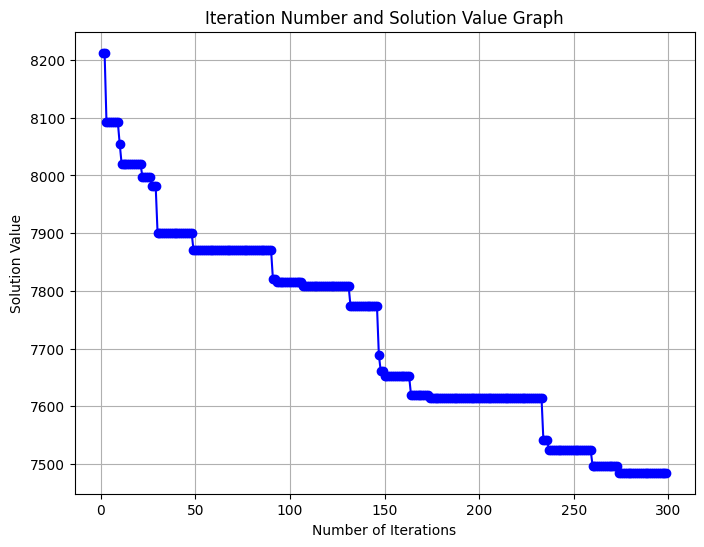

In [173]:

x = [item[0] for item in iterationList]  # iteration number
y = [item[1] for item in iterationList]  # Solution Values

# Graphic
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')

plt.xlabel('Number of Iterations')
plt.ylabel('Solution Value')
plt.title('Iteration Number and Solution Value Graph')

# Show
plt.grid(True)
plt.show()


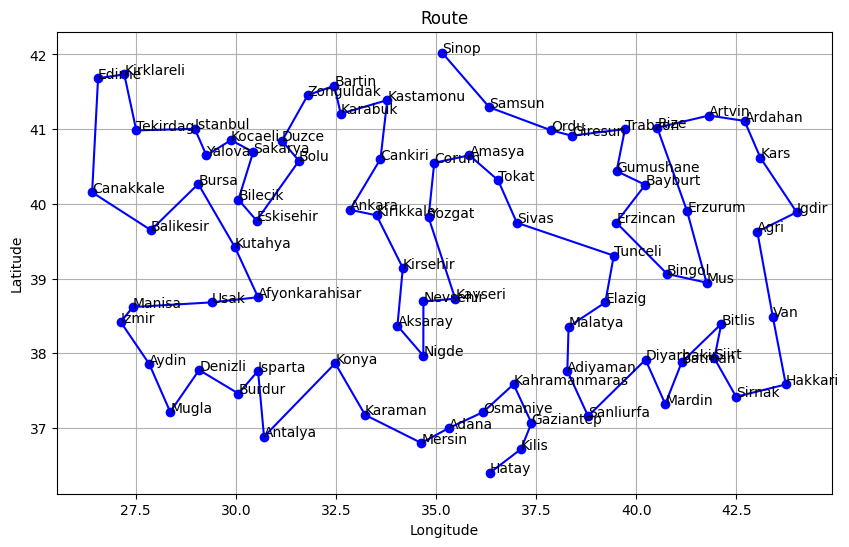

In [188]:
# Rotayı temsil eden plakaların veri çerçevesindeki karşılıklarını seçme
route = [df[df['Plaka'] == plaka].index[0] for plaka in bestSolution]

# Rotayı temsil eden noktaların enlem ve boylam bilgilerini alma
route_latitudes = df.loc[route, 'Enlem']
route_longitudes = df.loc[route, 'Boylam']

# Çizim işlemi
plt.figure(figsize=(10, 6))
plt.plot(route_longitudes, route_latitudes, marker='o', linestyle='-', color='b')
plt.title('Route')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Noktalara şehir adlarını eklemek istiyorsanız:
for i, txt in enumerate(df.loc[route, 'Il']):
    plt.annotate(txt, (route_longitudes.iloc[i], route_latitudes.iloc[i]))

plt.grid(True)
plt.show()

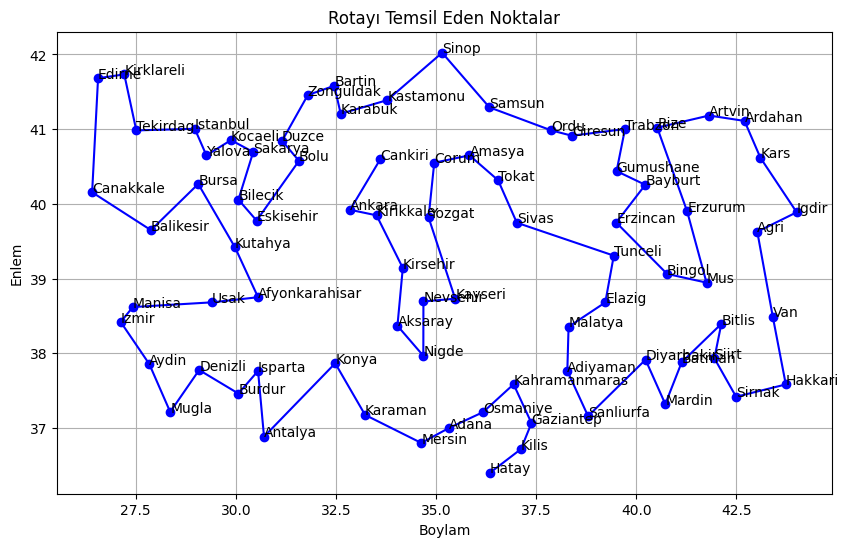

In [185]:
# Rotayı temsil eden plakaların veri çerçevesindeki karşılıklarını seçme
rotanin_sira_numaralari = [df[df['Plaka'] == plaka].index[0] for plaka in bestSolution]

# Rotayı temsil eden noktaların enlem ve boylam bilgilerini alma
rotanin_enlemleri = df.loc[rotanin_sira_numaralari, 'Enlem']
rotanin_boylamlari = df.loc[rotanin_sira_numaralari, 'Boylam']

# Çizim işlemi
plt.figure(figsize=(10, 6))
plt.plot(rotanin_boylamlari, rotanin_enlemleri, marker='o', linestyle='-', color='b')
plt.title('Rotayı Temsil Eden Noktalar')
plt.xlabel('Boylam')
plt.ylabel('Enlem')

# Noktalara şehir adlarını eklemek istiyorsanız:
for i, txt in enumerate(df.loc[rotanin_sira_numaralari, 'Il']):
    plt.annotate(txt, (rotanin_boylamlari.iloc[i], rotanin_enlemleri.iloc[i]))

plt.grid(True)
plt.show()